In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

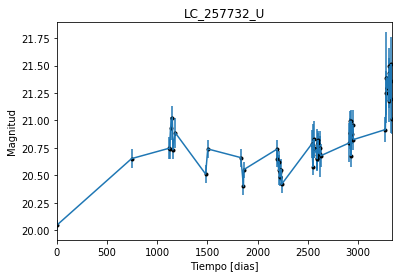

In [2]:
data = np.genfromtxt('LC_257732_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_257732_U')
plt.savefig("LC_257732_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

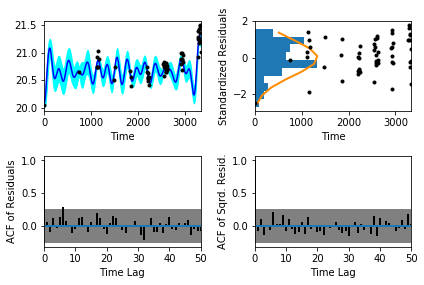

In [5]:
sample.assess_fit()

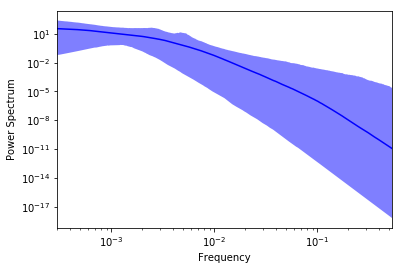

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

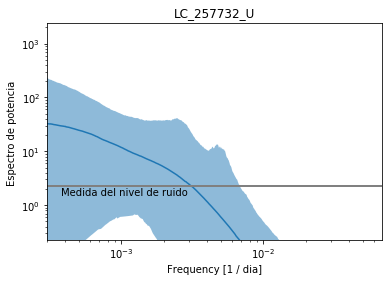

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_257732_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_257732_U')

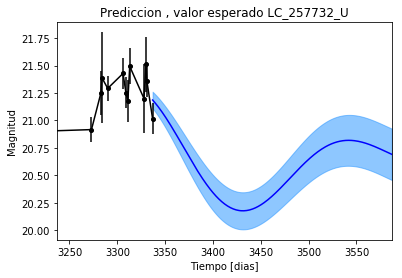

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_257732_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_257732_U')

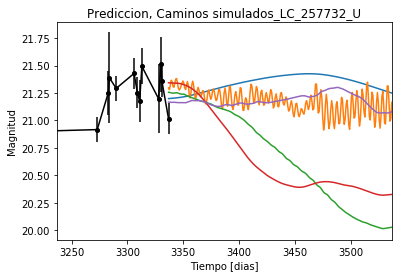

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_257732_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


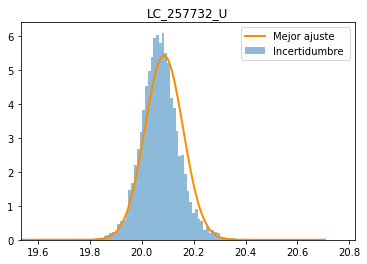

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_257732_U')
plt.savefig("Mejor_ajuste_LC_257732_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_257732_U')

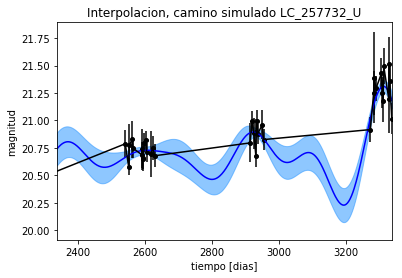

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_257732_U')

Text(0.5,1,'Interpolacion, camino simulado LC_257732_U')

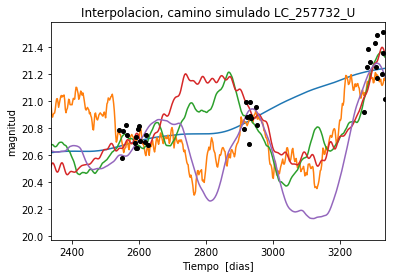

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_257732_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1154.28029727
Median: 0.0050174705917
Standard deviation: 0.176097820503
68% credibility interval: [ 0.00063228  0.11679817]
95% credibility interval: [  3.28897809e-04   6.98887868e-01]
99% credibility interval: [  3.02179389e-04   9.79502278e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 399.707028986
Median: 0.00173977644114
Standard deviation: 0.0910281637073
68% credibility interval: [ 0.0004327   0.02300136]
95% credibility interval: [ 0.00031185  0.2595522 ]
99% credibility interval: [  3.01411978e-04   7.35665606e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 376.950543858
Median: 0.0164457621011
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 997.283777057
Median: 50.845828775
Standard deviation: 1.59712587144
68% credibility interval: [ 49.1199218   51.98680002]
95% credibility interval: [ 46.65882713  52.86434431]
99% credibility interval: [ 44.40774976  53.4557985 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 209.940618882
Median: 0.45692909476
Standard deviation: 2.13609897227
68% credibility interval: [ 0.04486546  3.43128309]
95% credibility interval: [ 0.01449473  7.2063215 ]
99% credibility interval: [  9.93801779e-03   1.07079513e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 935.085388207
Median: 0.189938620992
Standard deviation: 8.78989540392
68% credibility interval: [  3.54080892e-03   5.33446299e+00]
95% credibility interva

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.1309495
Median: 3.55488227528e-18
Standard deviation: 4.03795594078e+92
68% credibility interval: [  1.74849046e-52   5.84076356e+04]
95% credibility interval: [  1.29375446e-92   2.25307527e+57]
99% credibility interval: [  8.33561349e-122   1.12087489e+087]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1690.35069214
Median: 20.6707391732
Standard deviation: 0.150118799987
68% credibility interval: [ 20.54328634  20.78339701]
95% credibility interval: [ 20.35510294  20.95073614]
99% credibility interval: [ 20.17009178  21.18900036]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 746.595413834
Median: 0.0053547393001
Standard deviation: 0.22035270413
68% credibility interval: [ 0.          0.24464397]
95% credibility interval: [ 0.          0.85139491]
99% credibility interval: [ 0.          1.03322113]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 746.595413834
Median: 0.0053547393001
Standard deviation: 0.22035270413
68% credibility interval: [ 0.          0.24464397]
95% credibility interval: [ 0.          0.85139491]
99% credibility interval: [ 0.          1.03322113]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 478.184649438
Median: 0.0
Standard deviation: 0.0011632938847
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 997.283777057
Median: 50.845828775
Standard deviation: 1.59712587144
68% credibility interval: [ 49.1199218   51.98680002]
95% credibility interval: [ 46.65882713  52.86434431]
99% credibility interval: [ 44.40774976  53.4557985 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 979.845597095
Median: 0.105228323682
Standard deviation: 0.110284987858
68% credibility interval: [ 0.06550164  0.18711769]
95% credibility interval: [ 0.04546269  0.39586309]
99% credibility interval: [ 0.03656866  0.6676752 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1442.68779564
Median: 0.958807714702
Standard deviation: 0.161207179258
68% credibility interval: [ 0.81810883  1.12963422]
95% credibility interval: [ 0.69854388  1.33374889]
99% credibility interval: [ 0.64724383  1.48895953]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 724.378975736
Median: 0.00010625633611
Standard deviation: 0.385286989916
68% credibility interval: [  2.37150335e-09   1.04500255e-02]
95% credibility interval: [  6.29013188e-63   4.48977923e-01]
99% credibility interval: [  1.96956157e-90   2.74527223e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1154.28029727
Median: (-0.0315256975009-0.667522741094j)
Standard deviation: 1.77232338082
68% credibility interval: [-0.73386458-1.73455208j -0.00397274-0.00718466j]
95% credibility interval: [ -4.39124198e+00-2.24925581j  -2.06652588e-03-0.63727137j]
99% credibility interval: [ -6.15439432e+00+0.j          -1.89864910e-03-0.00114029j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 399.707028986
Median: (-0.0109313377728+0.0480842034393j)
Standard deviation: 1.49800204851
68% credibility interval: [-0.14452182+0.j -0.00271875+0.j]
95% credibility interval: [-1.63081456 +1.72380408e+00j -0.00195944 +3.68559576e-05j]
99% credibility interval: [ -4.62232333e+00+4.95076687j  -1.89382731e-03+0.j        ]
Posterior summary